In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
csv_data = pd.read_csv('train.csv')
csv_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(csv_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
houseData = csv_data.select_dtypes(include = [np.int64, object])
houseData.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


In [6]:
houseCatData = houseCatData.astype('category')
print(houseCatData.dtypes)

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object


In [7]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


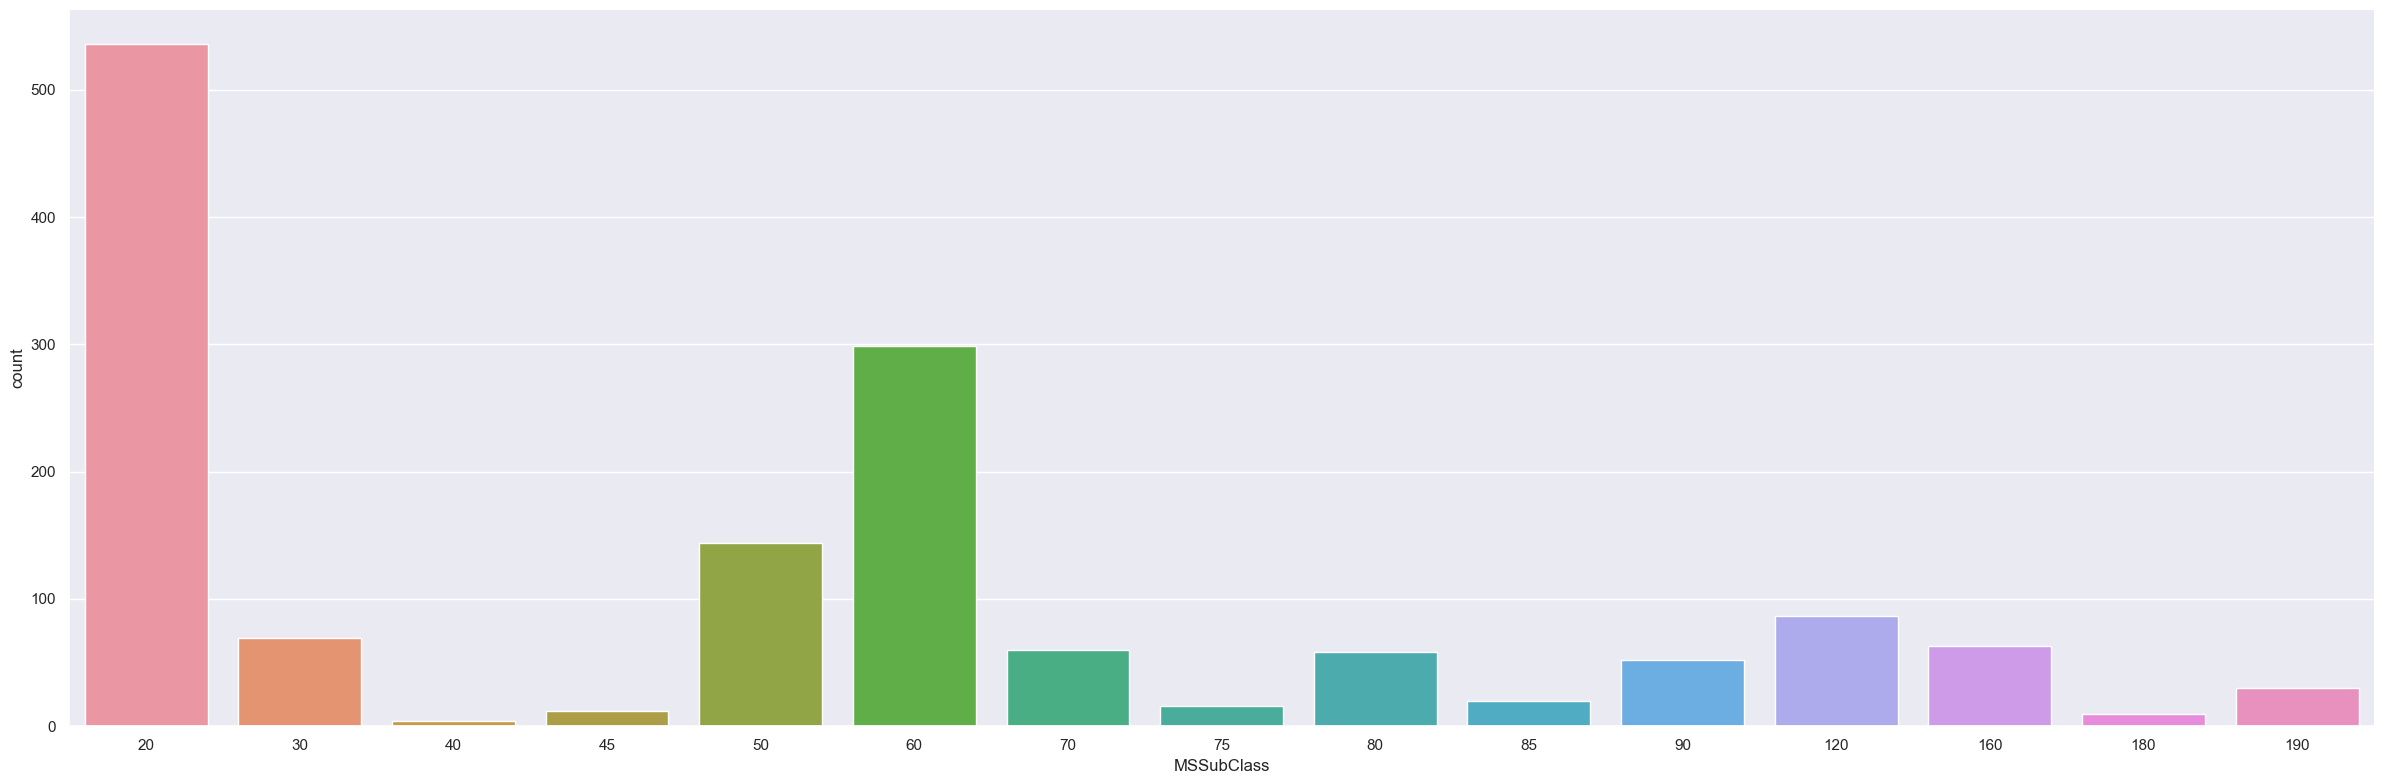

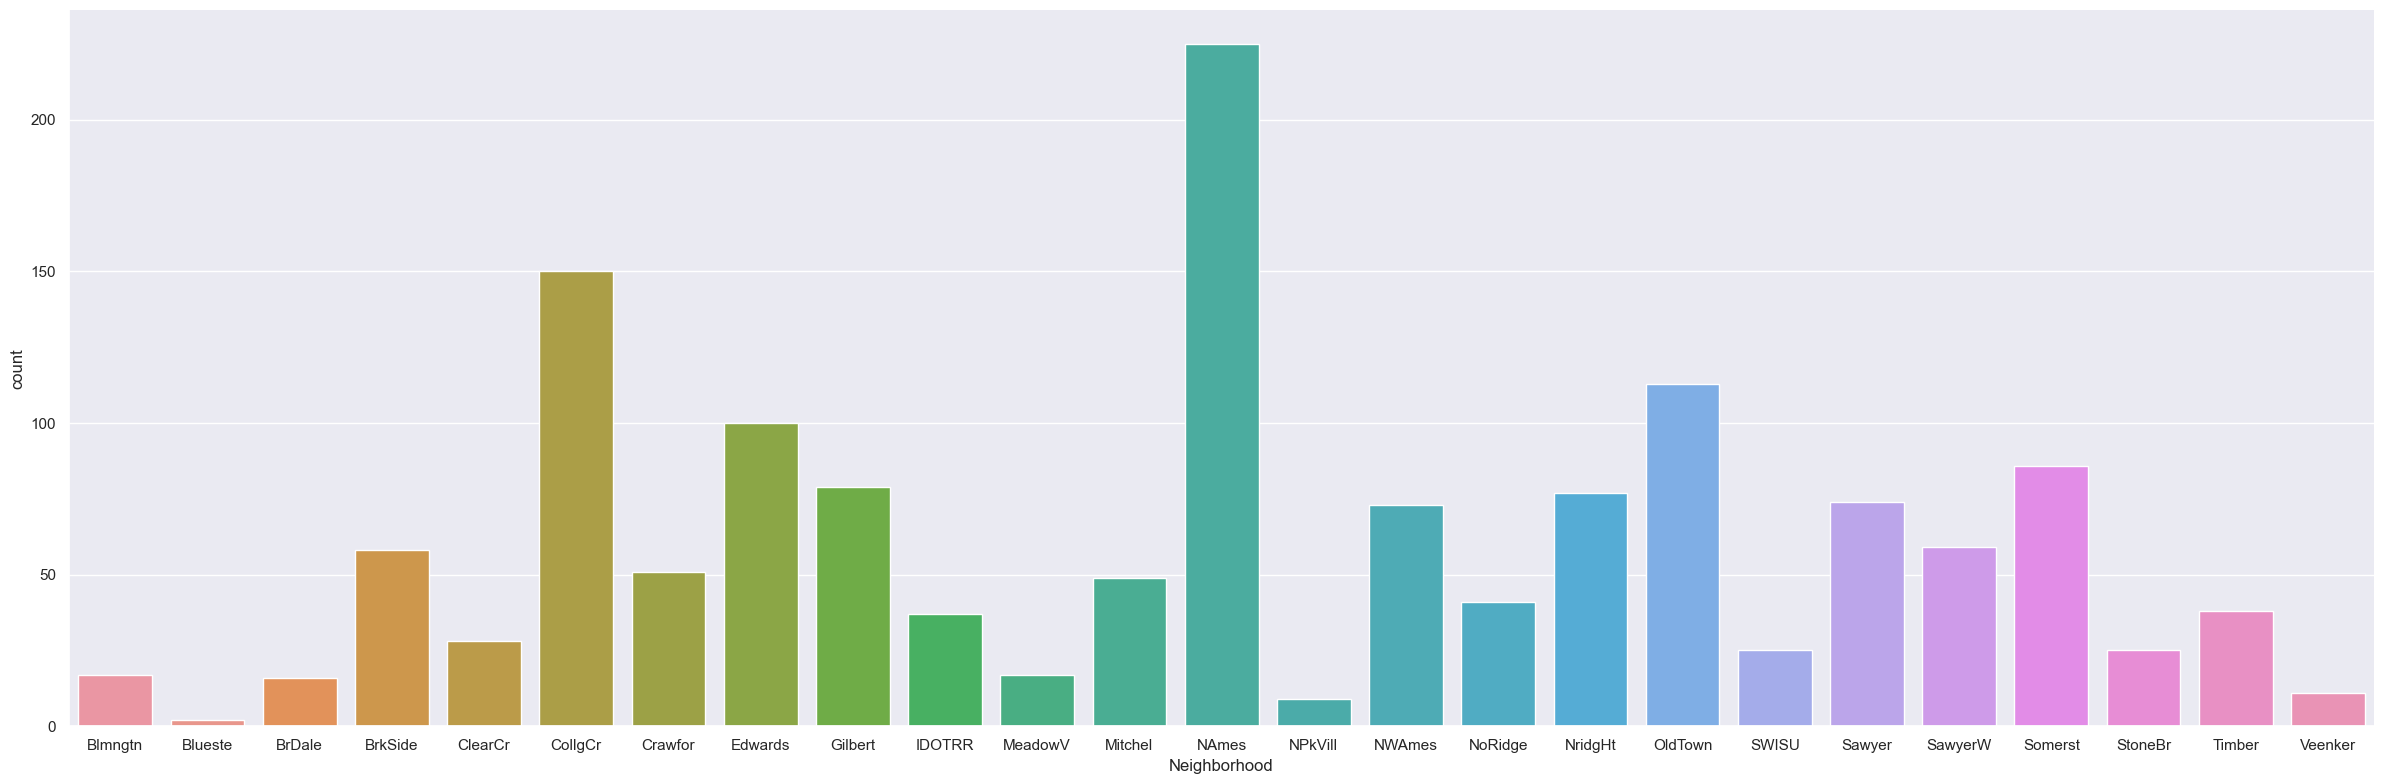

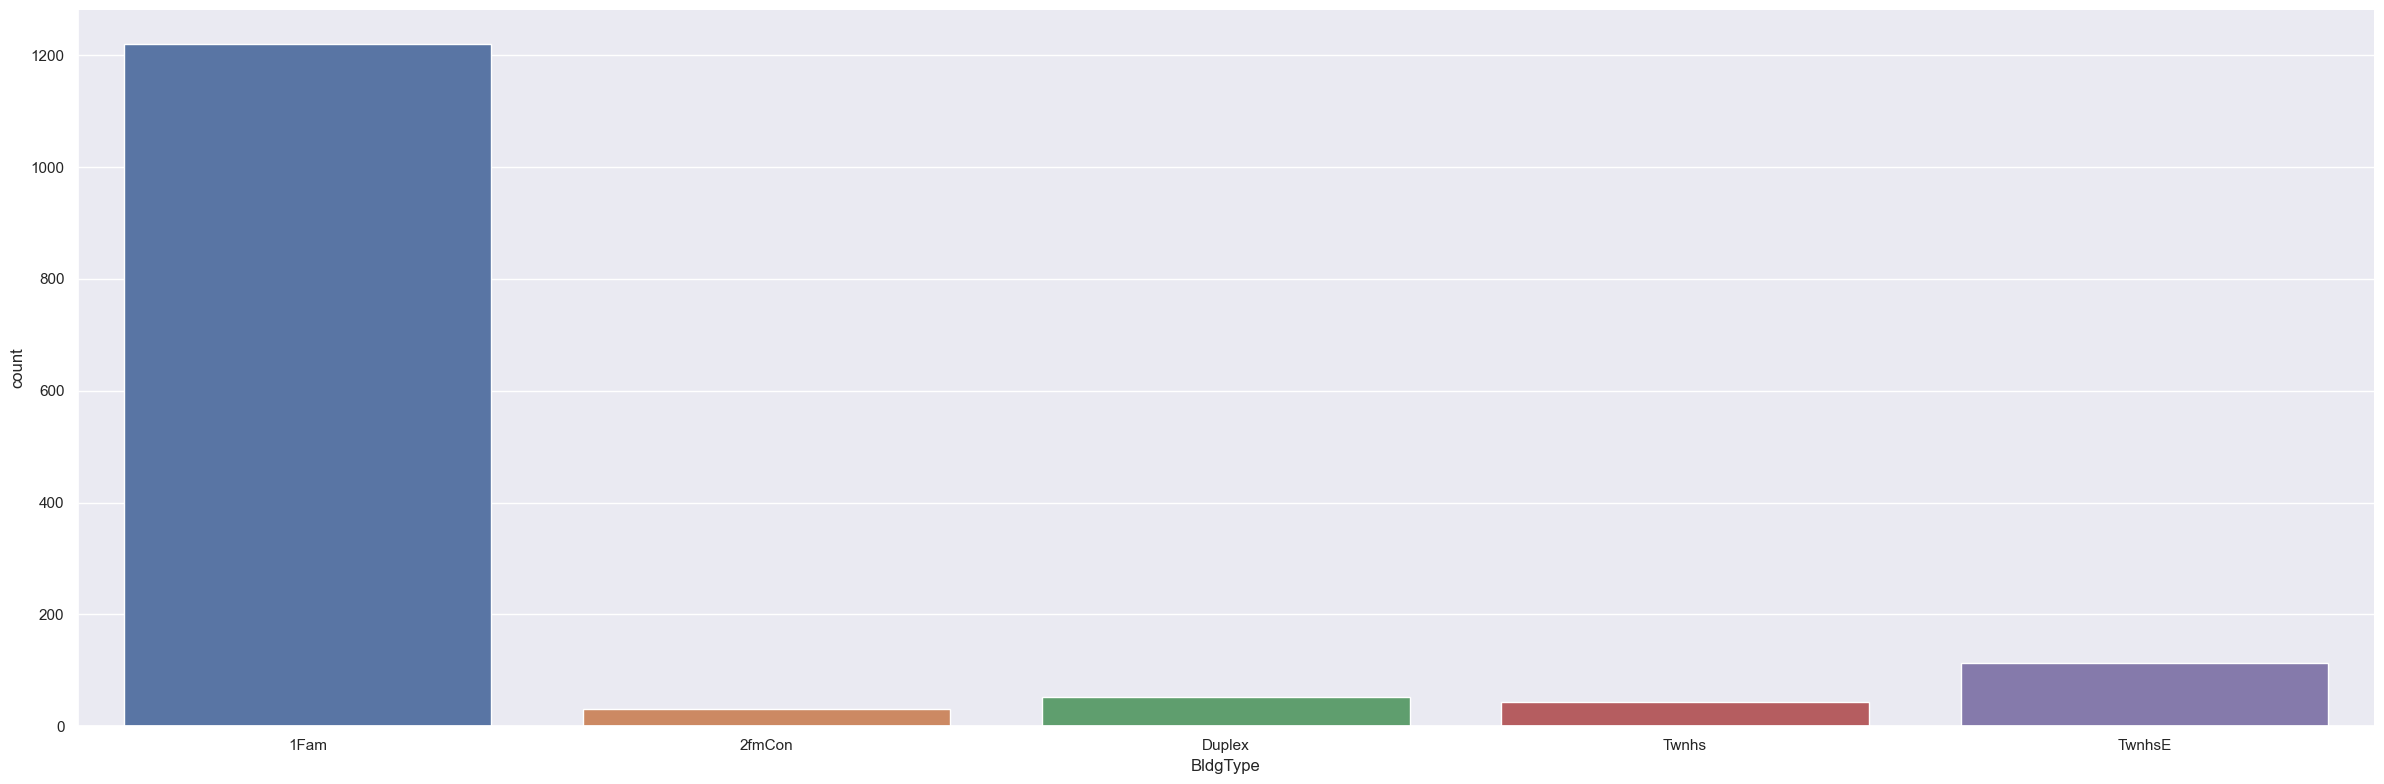

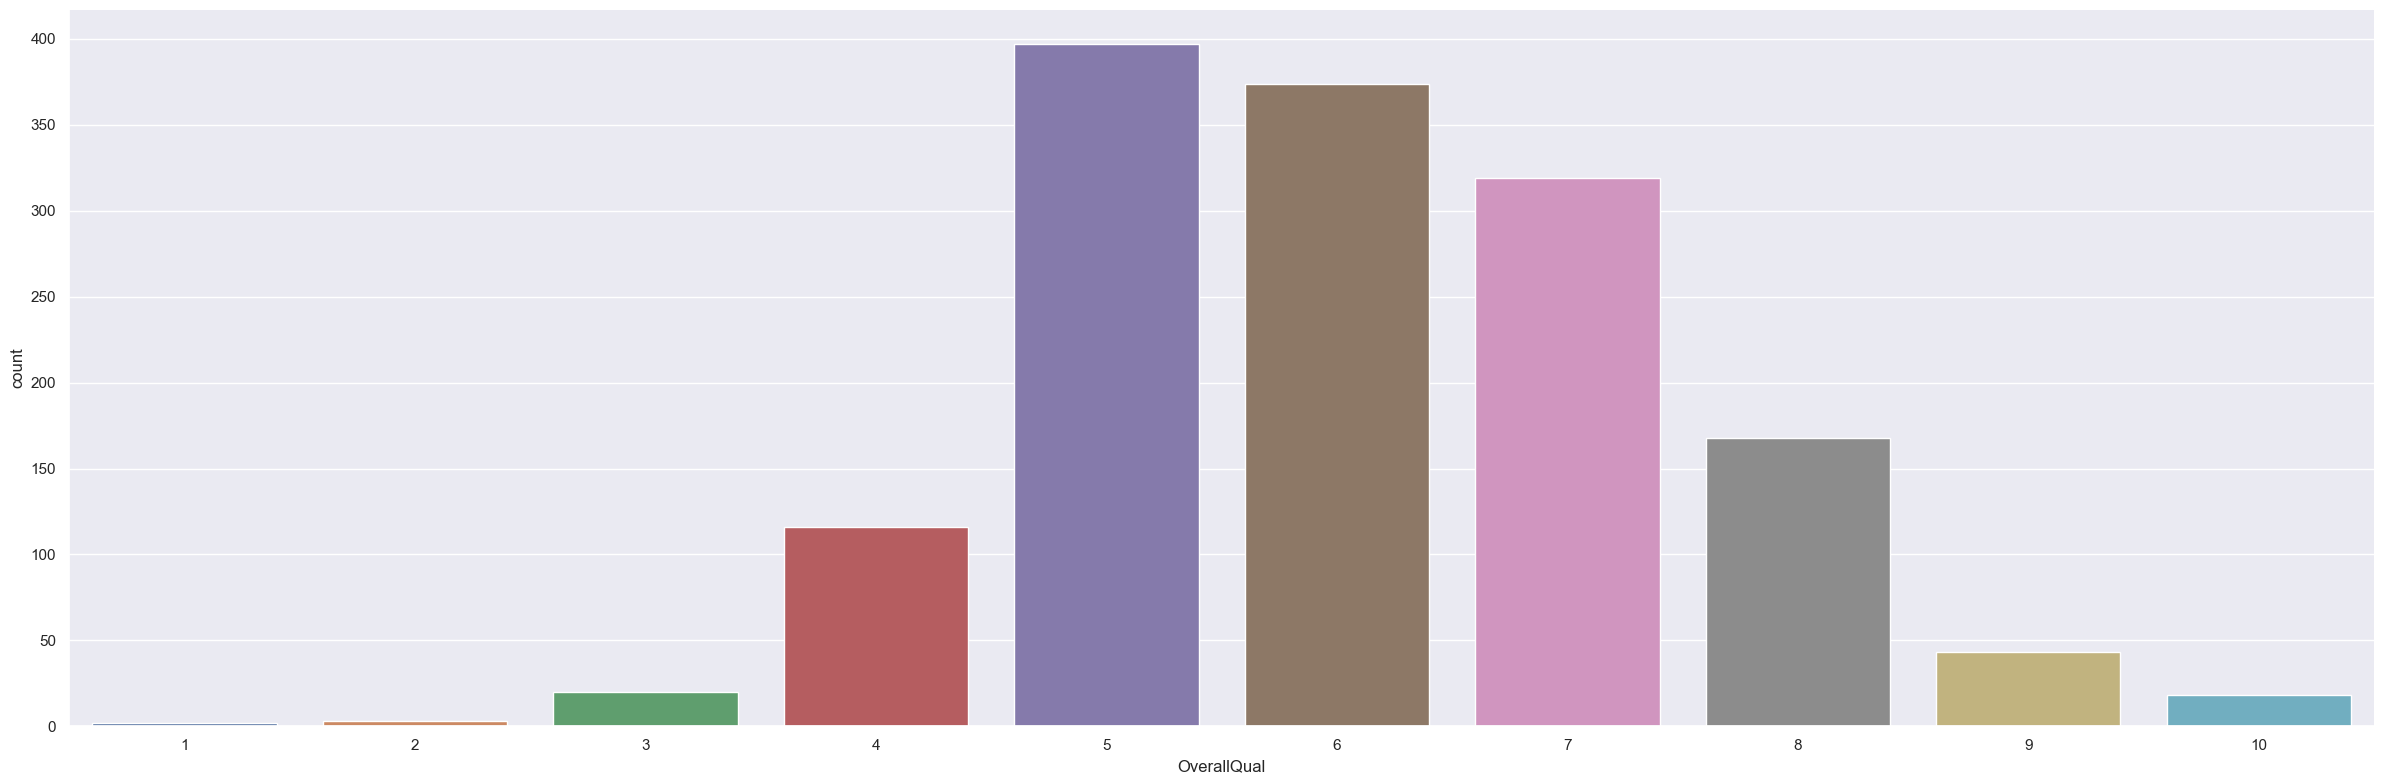

In [8]:
for var in houseCatData:
    sb.catplot(x = var, data = houseCatData, kind = 'count', height=8, aspect=3)
plt.show()

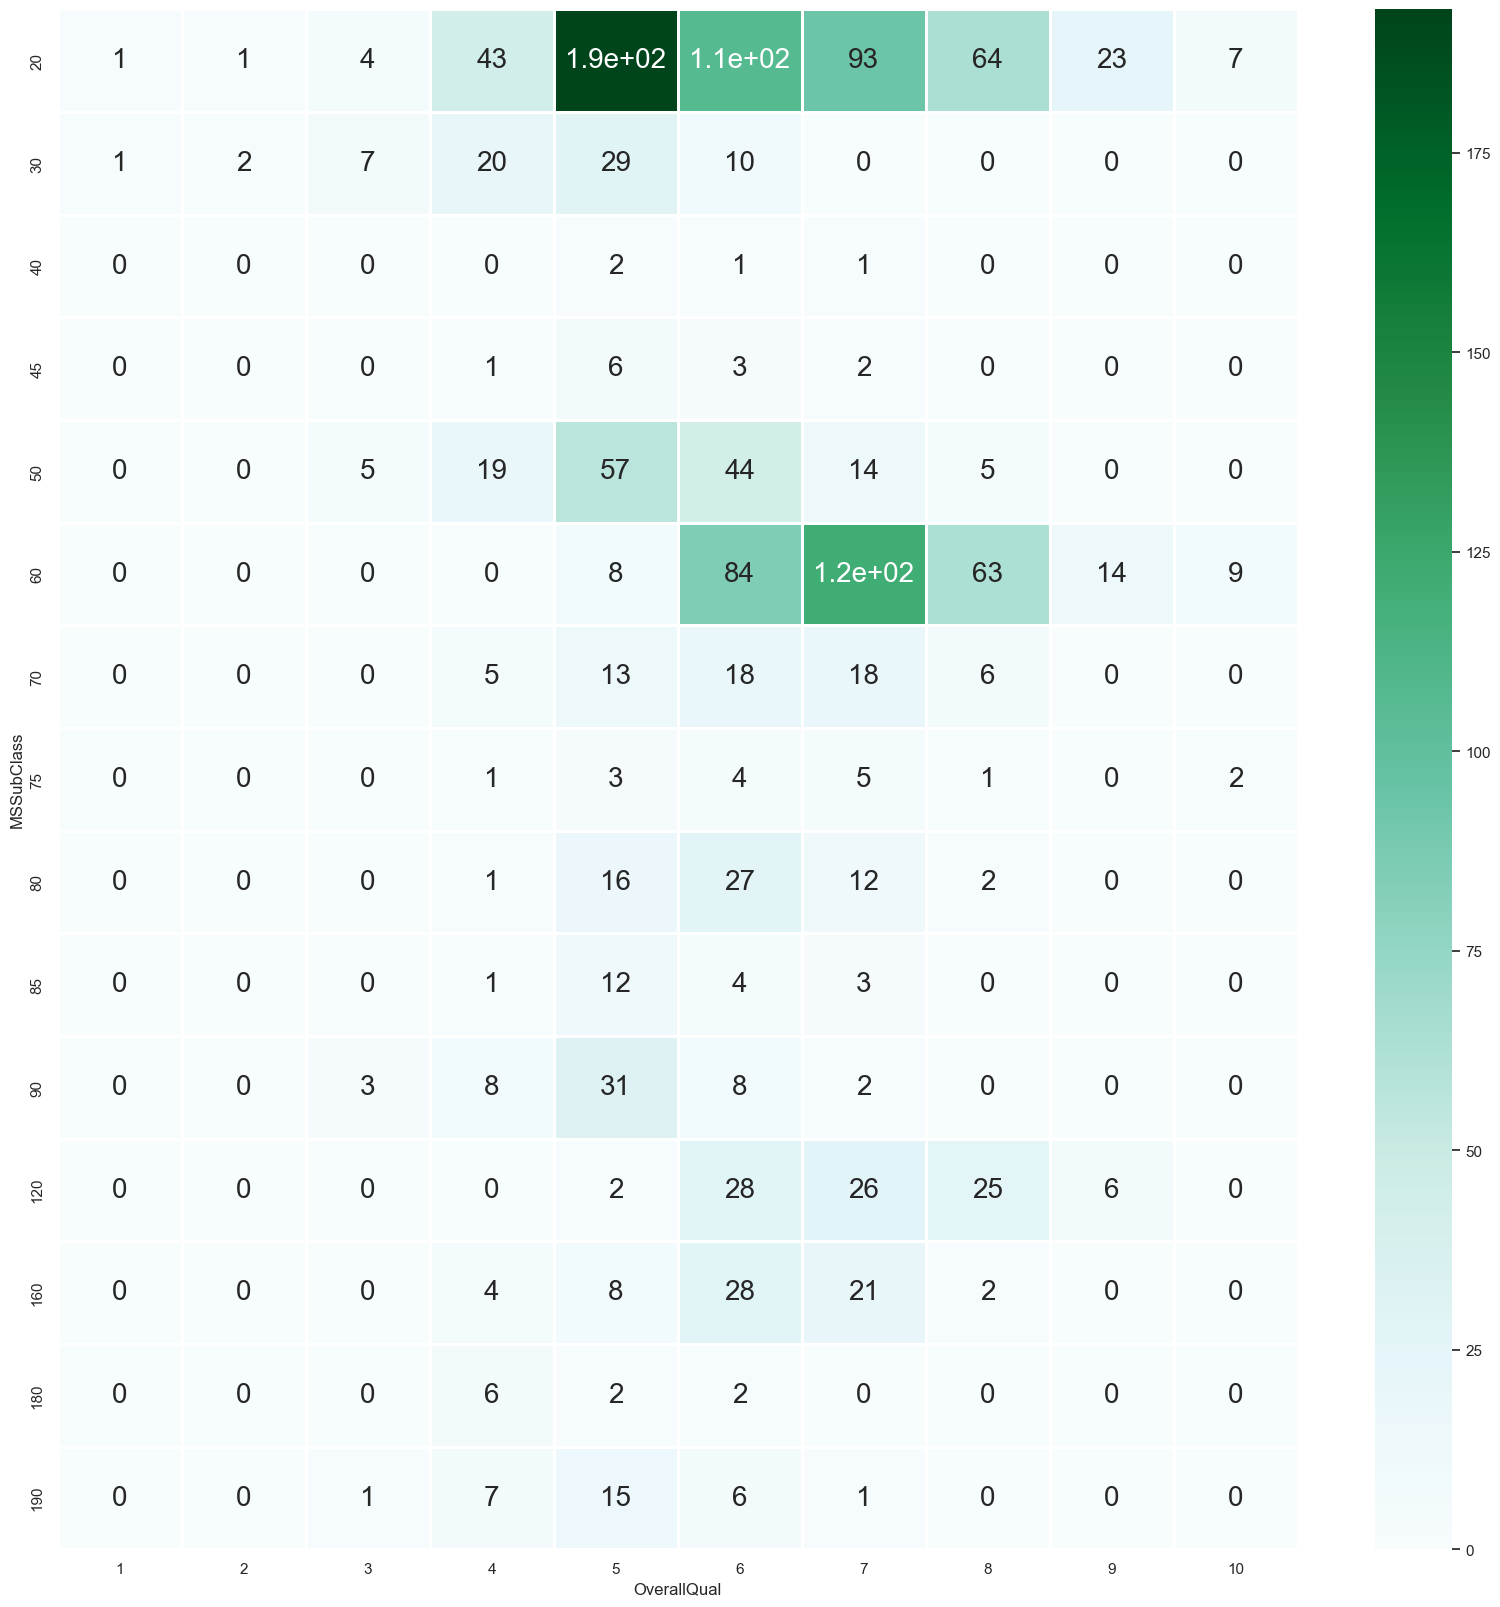

In [9]:
f = plt.figure(figsize = (20,20))
sb.heatmap(houseCatData.groupby(['MSSubClass', 'OverallQual']).size().unstack(),
          linewidths = 1, annot = True, annot_kws = {"size": 20}, cmap = "BuGn")
plt.show()

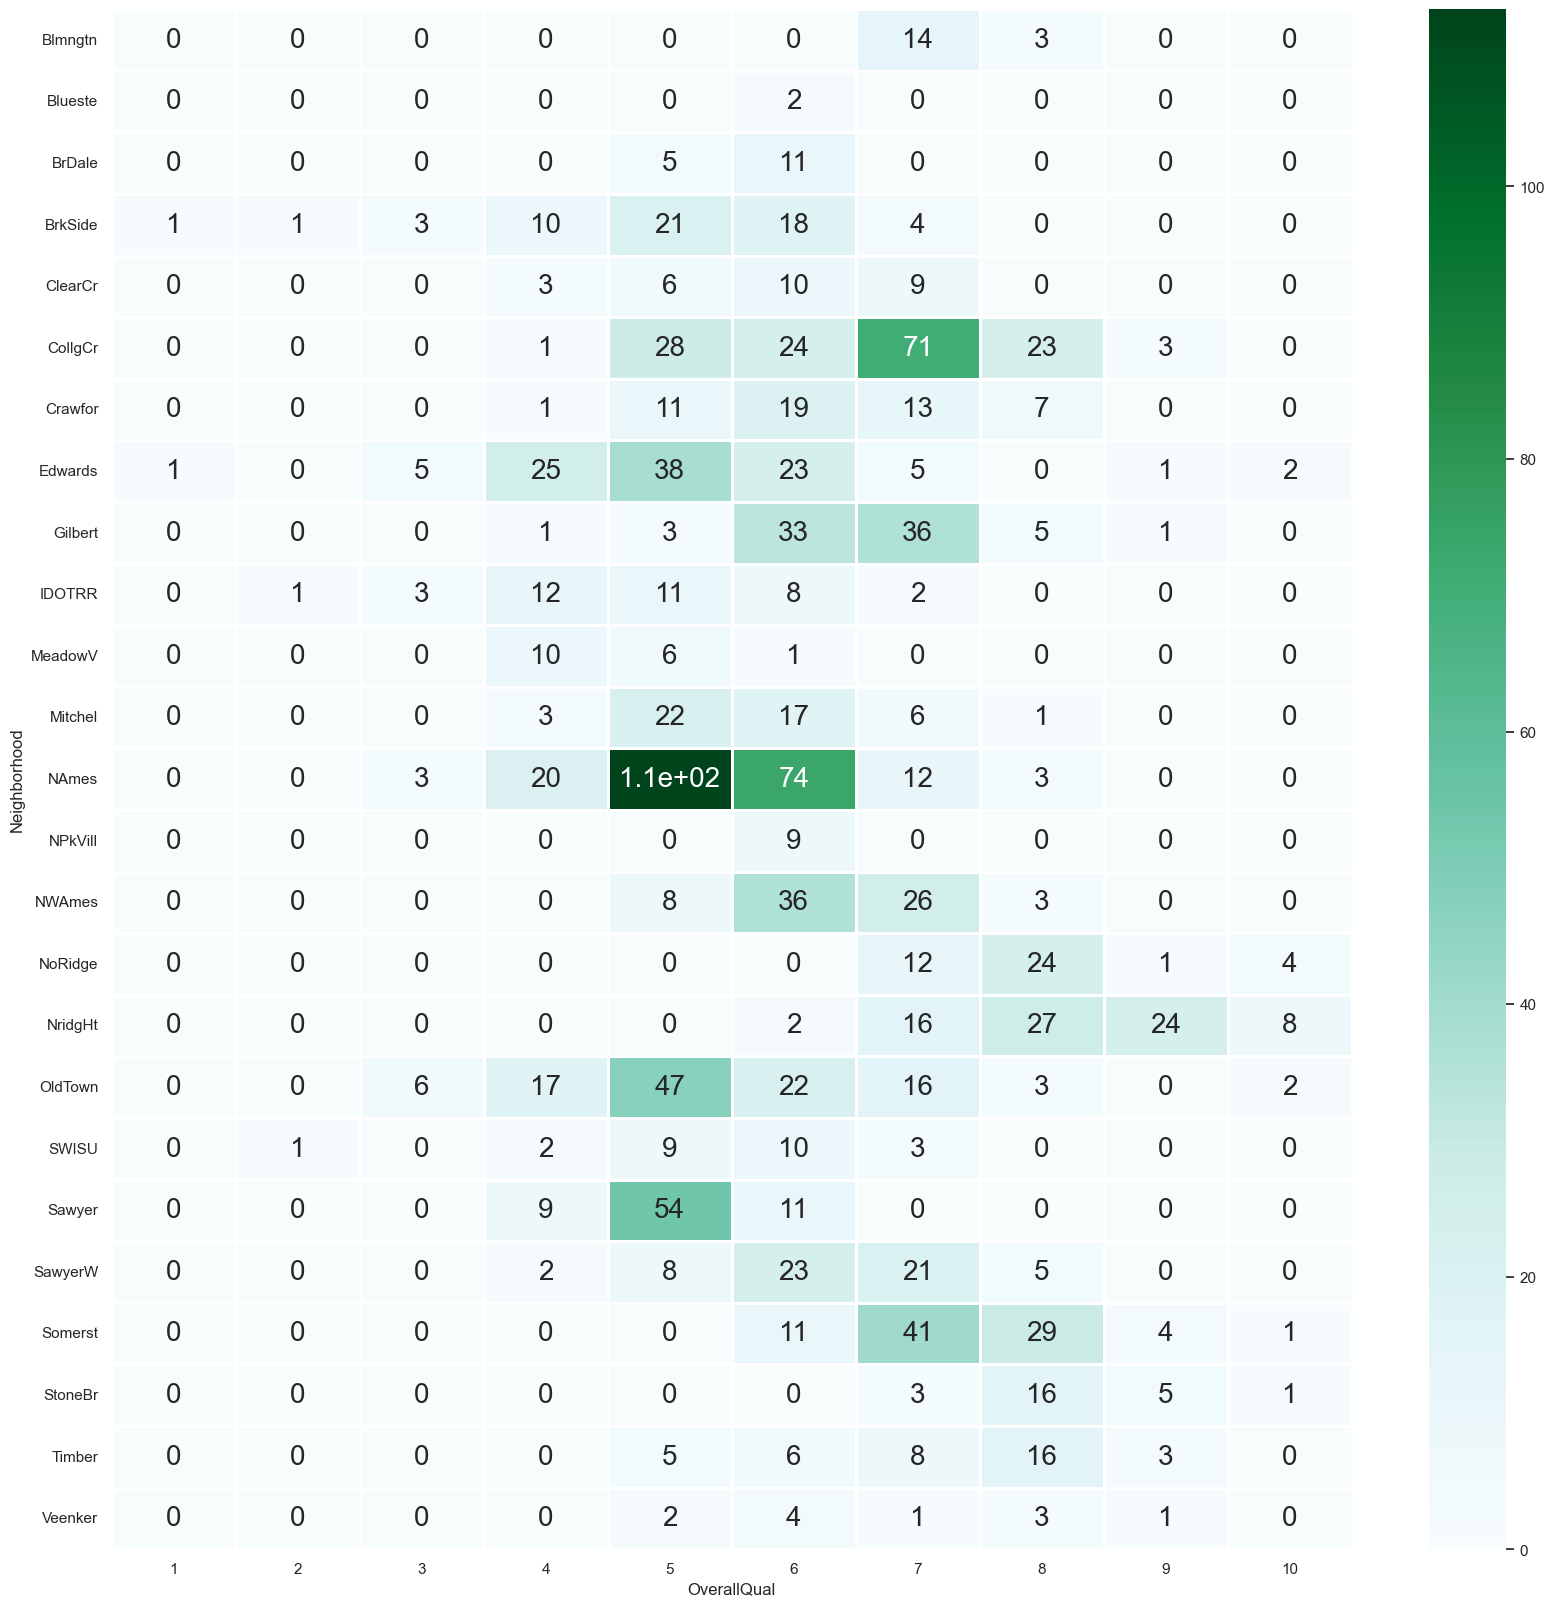

In [10]:
f = plt.figure(figsize = (20,20))
sb.heatmap(houseCatData.groupby(['Neighborhood', 'OverallQual']).size().unstack(),
          linewidths = 1, annot = True, annot_kws = {"size": 20}, cmap = "BuGn")
plt.show()

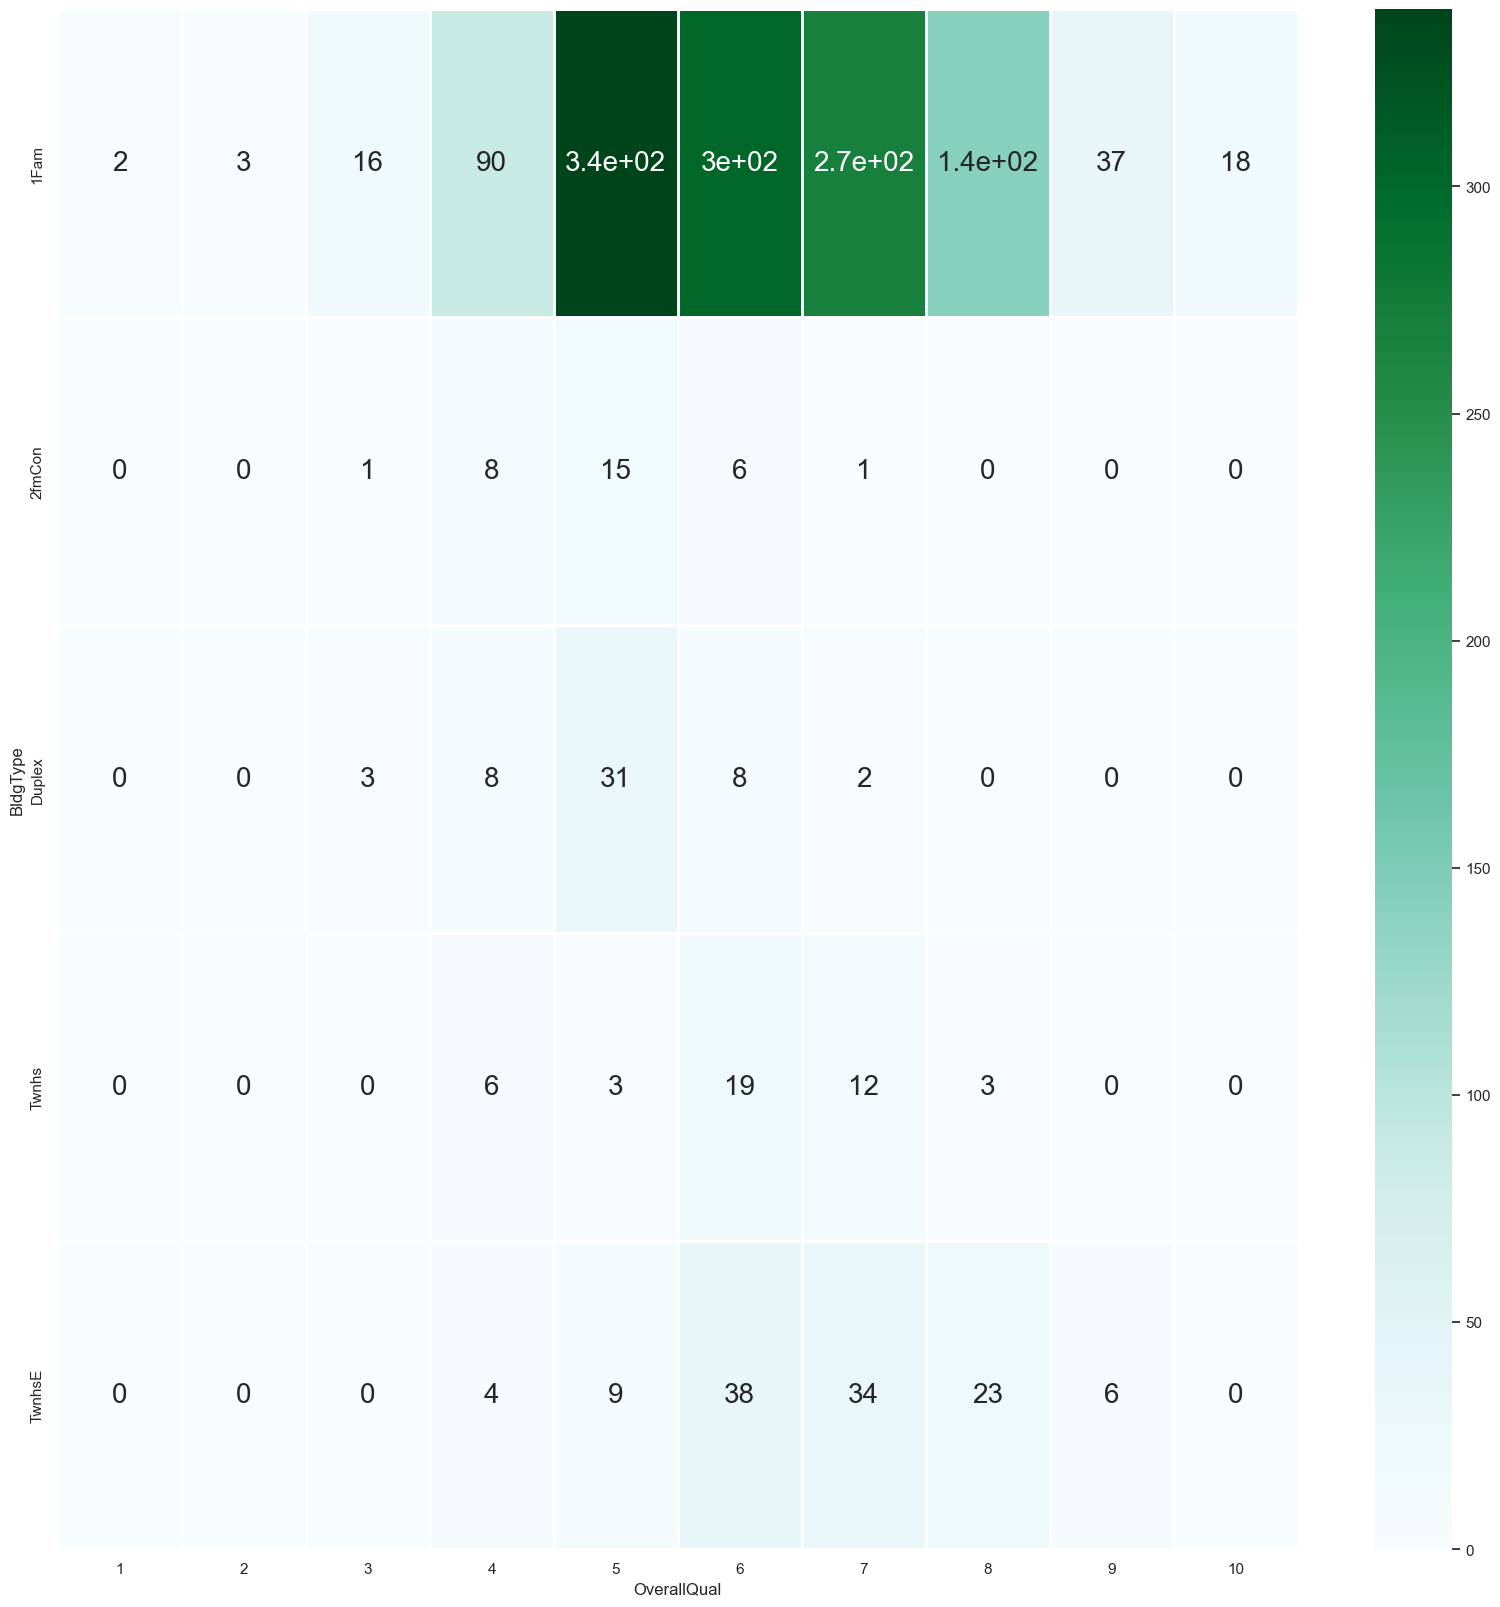

In [11]:
# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['BldgType', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 20}, cmap = "BuGn")
plt.show()

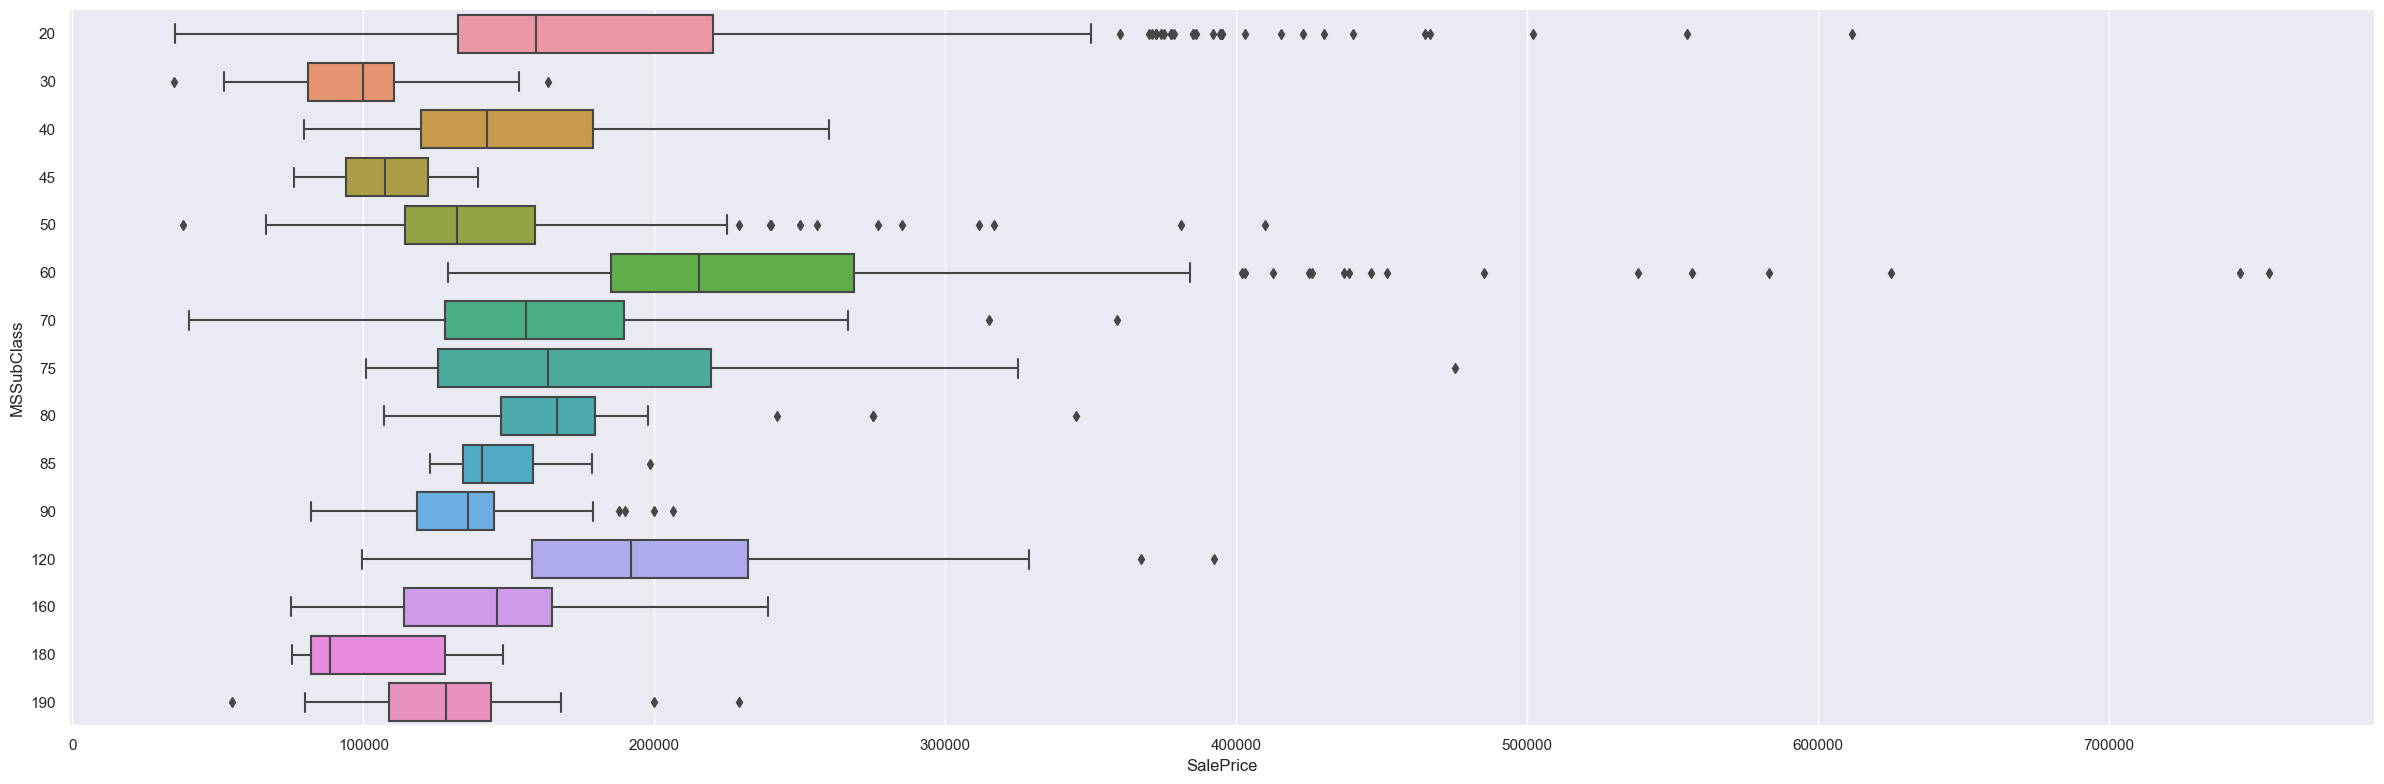

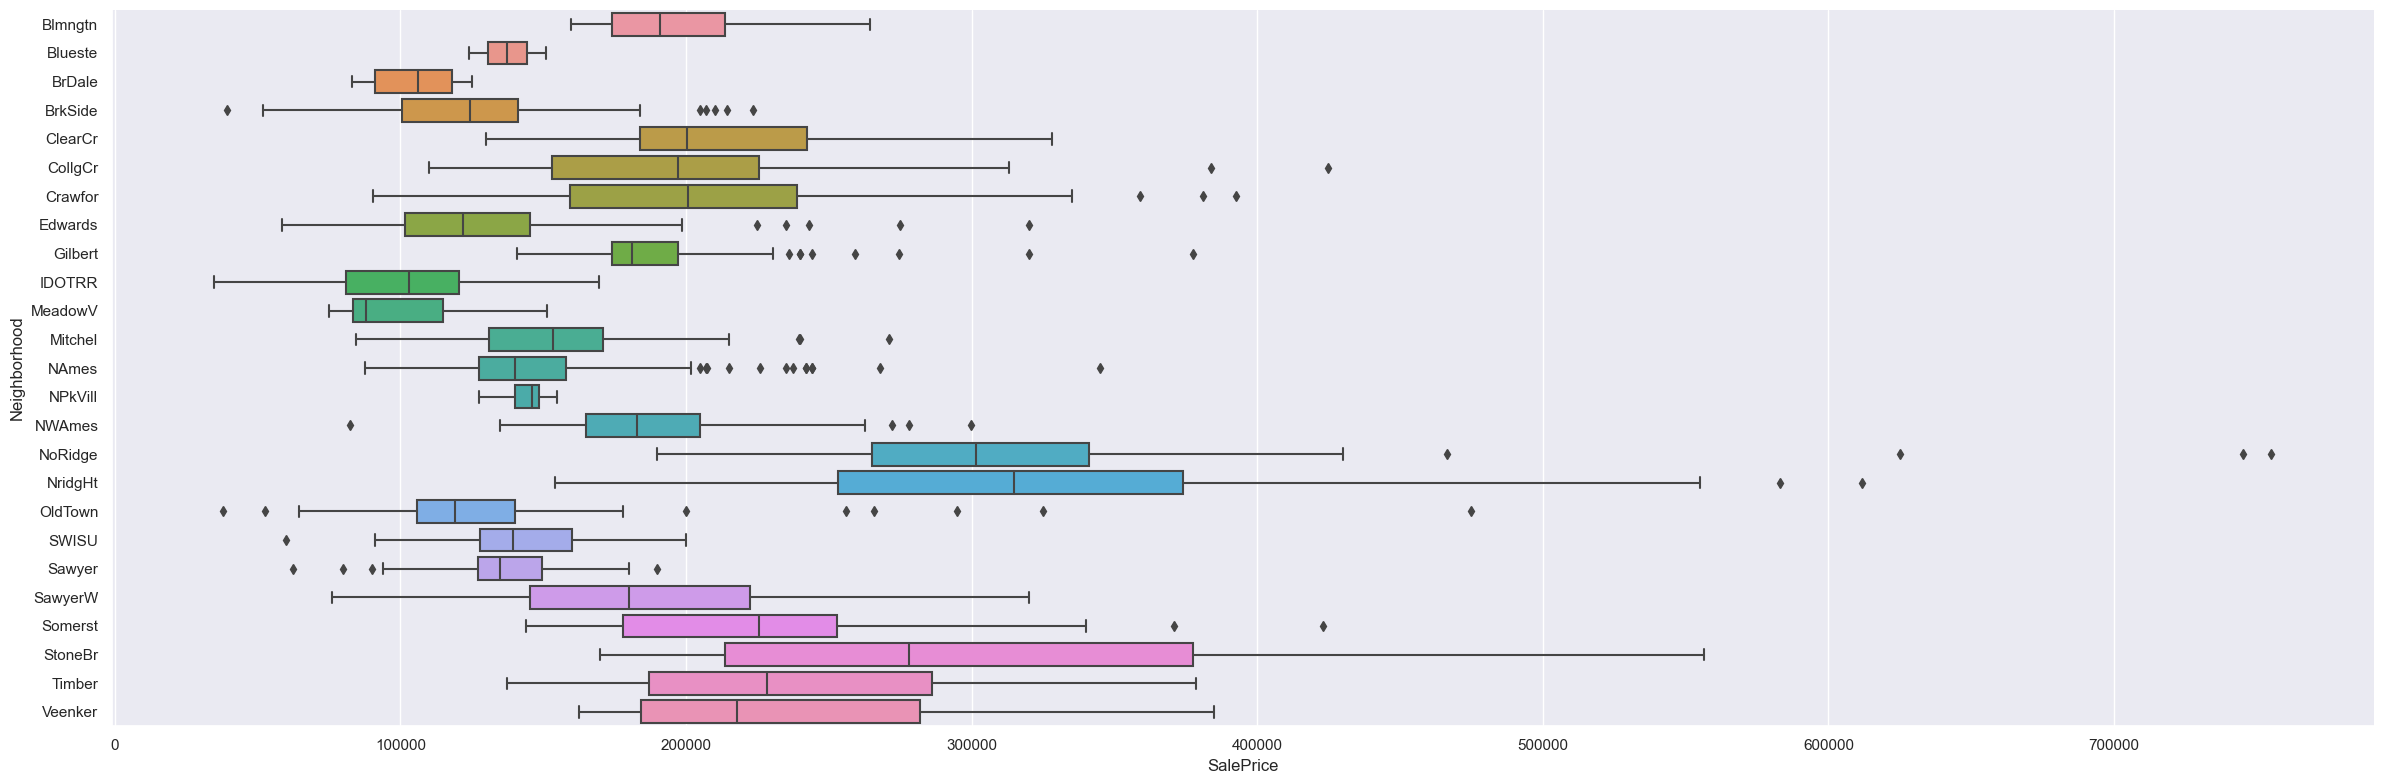

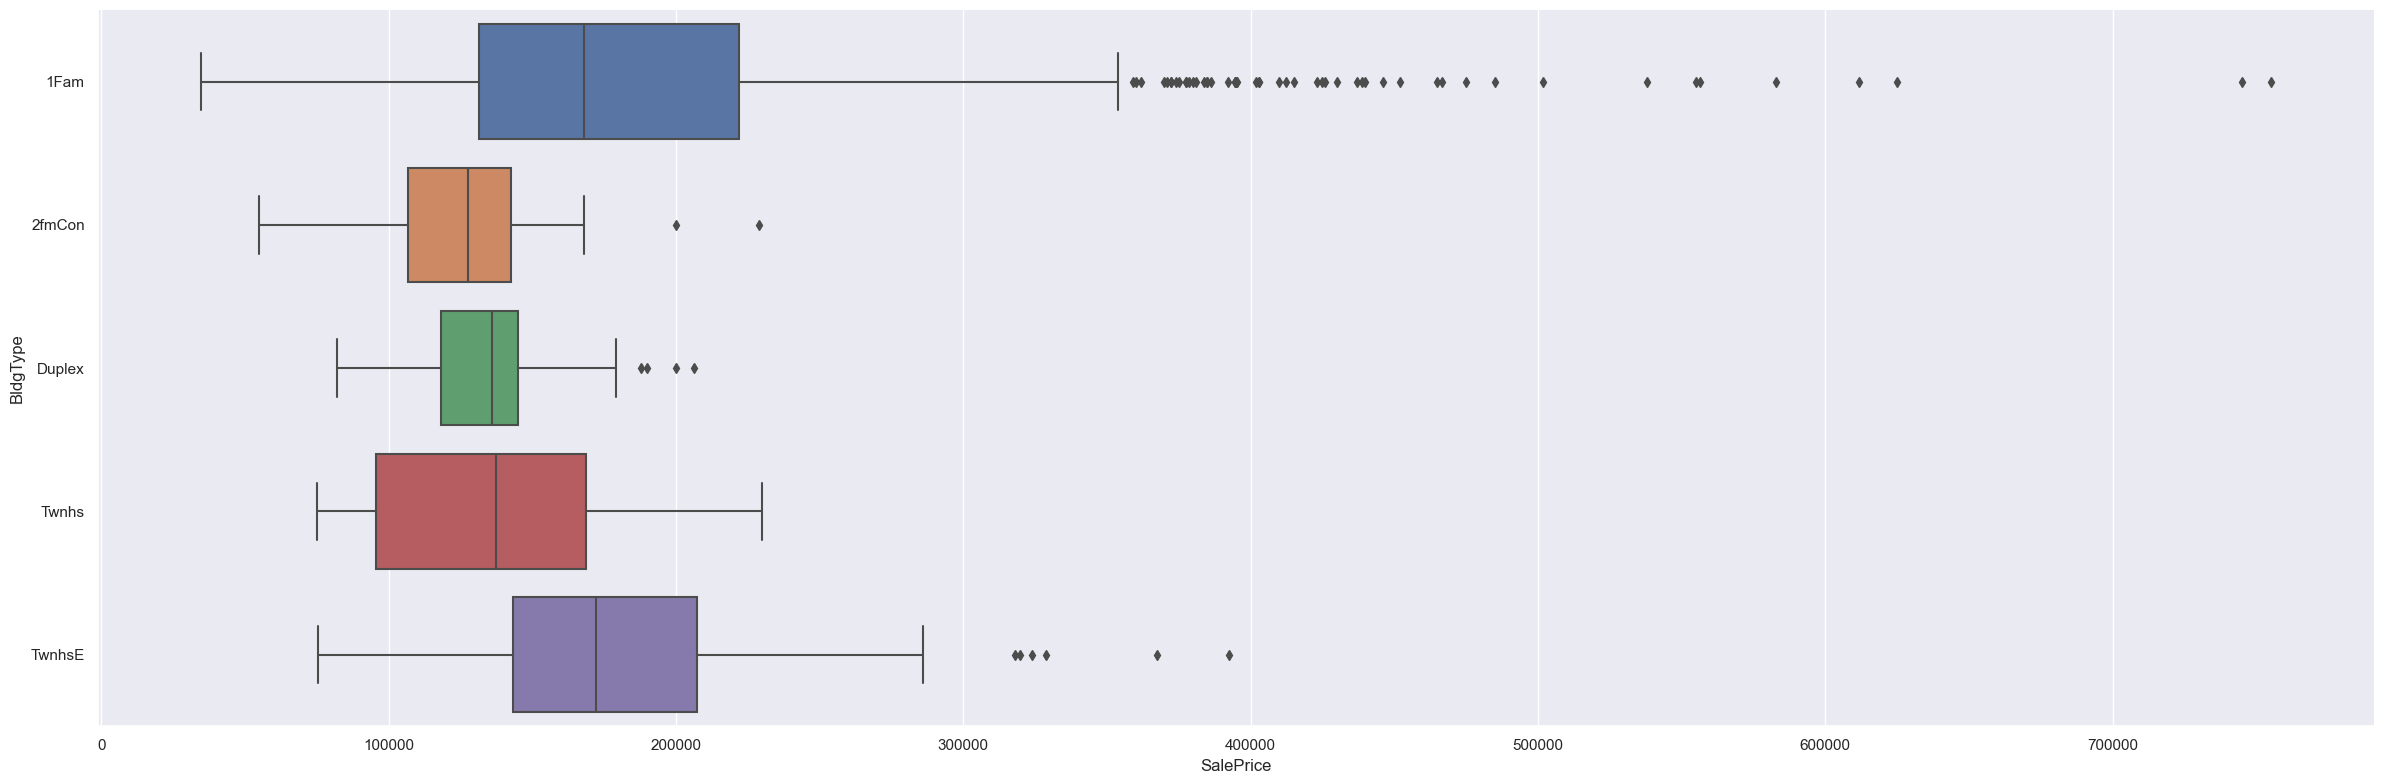

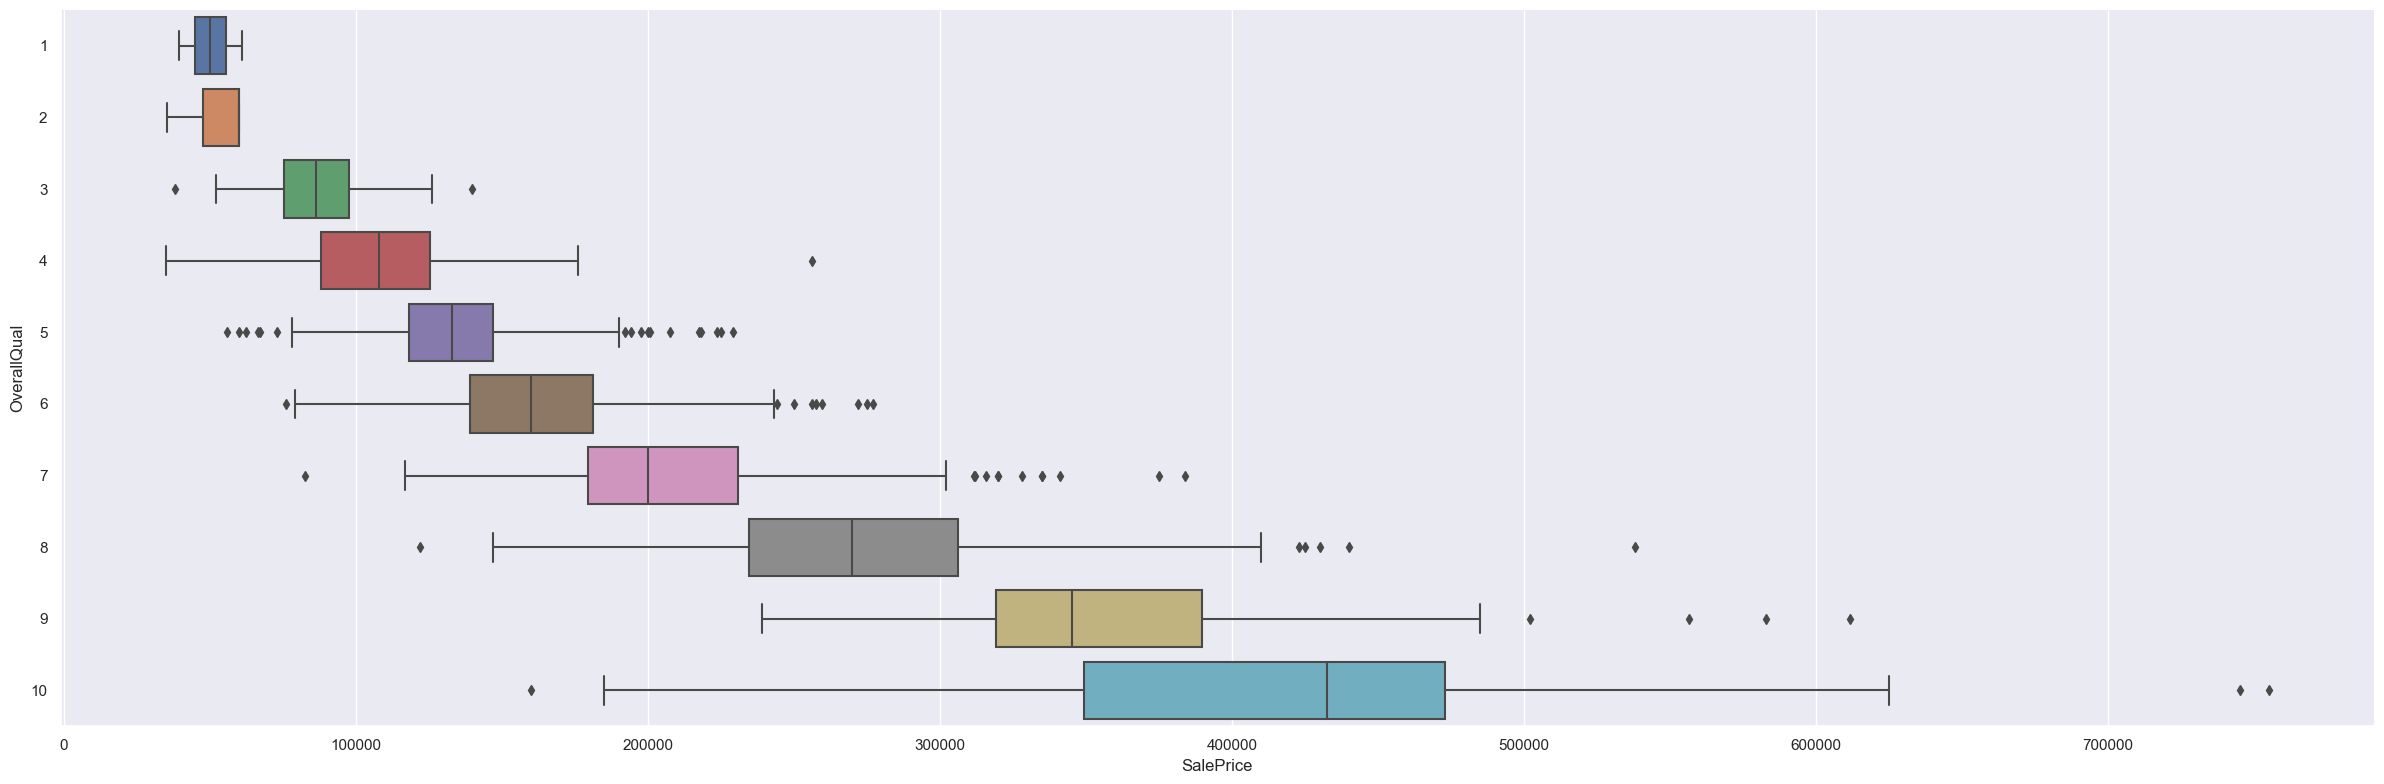

In [14]:
salePrice = pd.Series(houseData['SalePrice'])
jointdf = pd.concat([salePrice, houseCatData], axis = 1).reindex(salePrice.index)

for var in houseCatData:
    sb.catplot(x = 'SalePrice', y = var, data = jointdf, kind = 'box', height = 8, aspect = 3)
    
plt.show()